In [33]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import hinge_loss

In [51]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1
X,y = shuffle(df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])],df['partner'] - 1)
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]


In [ ]:
# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [36]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [37]:
df.corr()['partner']

idno      -0.014931
year       0.018689
tvtot     -0.028816
ppltrst   -0.034371
pplfair   -0.034054
pplhlp    -0.022069
happy     -0.145061
sclmeet    0.162970
sclact     0.011405
gndr       0.033984
agea      -0.256670
partner    1.000000
Name: partner, dtype: float64

In [39]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_test)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[454  51]
 [151 159]]


In [48]:
from sklearn.metrics import accuracy_score
print("Accuracy={}".format(accuracy_score(y_test, predict_test)))

Accuracy=0.7521472392638037


Text(0, 0.5, 'Deviance')

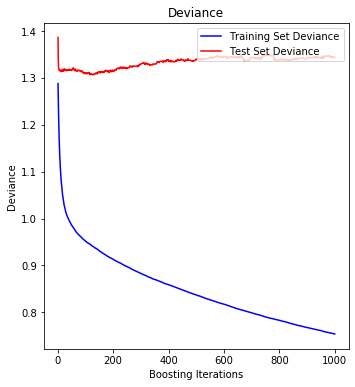

In [17]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

Changes

In [114]:
from sklearn.utils import resample
# Lets resample to 3522 to meet the total values
# So less nonfraudulent samples.
majority = df[df.partner ==1]
minority = df[df.partner ==2]

# Downsample majority class
majority_downsampled = resample(majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=3000)  

# Upsample minority class
minority_upsampled = resample(minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=3000)  
 
# Combine downsampled majority class with minority class
df1 = pd.concat([majority_downsampled, minority_upsampled])
 
# Display new class counts
df1.partner.value_counts()

2.0    3000
1.0    3000
Name: partner, dtype: int64

In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 5938 to 1141
Data columns (total 13 columns):
cntry      6000 non-null object
idno       6000 non-null float64
year       6000 non-null int64
tvtot      6000 non-null float64
ppltrst    6000 non-null float64
pplfair    6000 non-null float64
pplhlp     6000 non-null float64
happy      6000 non-null float64
sclmeet    6000 non-null float64
sclact     6000 non-null float64
gndr       6000 non-null float64
agea       6000 non-null float64
partner    6000 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 656.2+ KB


In [121]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1
X,y = shuffle(df1.loc[:, ~df1.columns.isin(['partner', 'cntry', 'idno'])],df1['partner'] - 1)
y = df1['partner'] - 1
X = df1.loc[:, ~df1.columns.isin(['partner', 'cntry', 'idno'])]


In [122]:
X

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea
5938,6,3.0,7.0,5.0,5.0,9.0,7.0,3.0,2.0,58.0
3252,6,3.0,7.0,7.0,4.0,7.0,6.0,4.0,1.0,33.0
5863,6,1.0,5.0,4.0,2.0,10.0,6.0,4.0,2.0,19.0
7711,7,7.0,7.0,7.0,5.0,8.0,4.0,2.0,2.0,83.0
211,6,3.0,7.0,7.0,7.0,9.0,6.0,3.0,1.0,56.0
912,7,4.0,6.0,7.0,5.0,10.0,5.0,3.0,1.0,32.0
3600,6,7.0,5.0,5.0,5.0,8.0,4.0,2.0,2.0,65.0
3700,6,4.0,5.0,5.0,5.0,10.0,7.0,2.0,1.0,54.0
6373,7,0.0,3.0,7.0,5.0,7.0,3.0,2.0,1.0,31.0
7491,6,1.0,7.0,7.0,7.0,10.0,5.0,2.0,1.0,29.0


In [123]:
# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df1['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [141]:
params = {'n_estimators': 500,
          'max_depth': 5,
          'loss': 'exponential',
          'learning_rate': 0.75,
         'subsample':0.5}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)



In [142]:
from sklearn.metrics import accuracy_score
print("Accuracy={}".format(accuracy_score(y_test, predict_test)))

Accuracy=0.8133333333333334


In [130]:
from sklearn.model_selection import GridSearchCV
parameter_grid = {'max_depth': [1, 2],
                  'n_estimators' :[500,1000]}

# Use the grid
grid_search = GridSearchCV(clf, param_grid = parameter_grid,scoring='accuracy',
                          cv =10)
# Fit the grid
grid_search.fit(X_train, y_train)

# Return best parameters and best score
print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.7094444444444444
Best params: {'max_depth': 1, 'n_estimators': 1000}


Text(0, 0.5, 'Deviance')

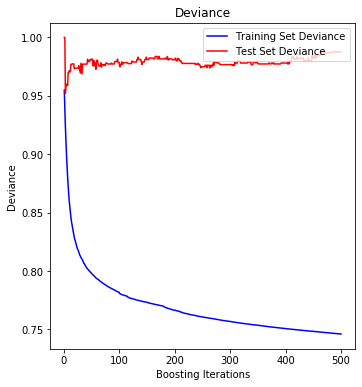

In [91]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')